<a href="https://colab.research.google.com/github/MahithaPoduvu/Mahitha_INFO5731_-Spring2023/blob/main/In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
#KNN model

In [19]:
#Decision tree model
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/heart.csv')
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
y = data['target']
X = data.drop(['target'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [21]:
export_Train = pd.concat([X_train, y_train], axis = 1)
export_Train.to_csv('train_df.csv', index = False)
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [22]:
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [23]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='log2')

In [26]:
DT_Model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, splitter='best')

DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=4)

In [27]:
print (f'Train Accuracy - : {DT_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.809
Test Accuracy - : 0.790


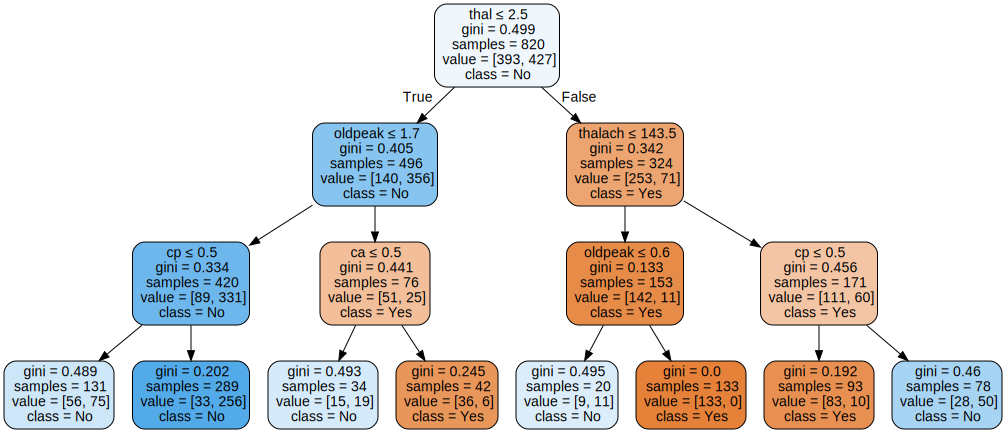

In [29]:
dot_data = export_graphviz(DT_Model,   
                      out_file=None, 
                      feature_names=X.columns,       
                      class_names=['Yes','No'],      
                      filled=True, rounded=True,     
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [30]:
dot_data = export_graphviz(DT_Model, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Yes','No'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("Heart_Diesease") 

'Heart_Diesease.pdf'

In [ ]:
#Random Forest
import pandas as pd
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/heart_cleveland_upload.csv')
data.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
y = data['condition']
X = data.drop(['condition'], axis = 1)
print(f'X : {X.shape}')

X : (297, 13)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (237, 13)
y_train : (237,)
X_test : (60, 13)
y_test : (60,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier(oob_score=True)
rf_Model.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
rf_Model.oob_score_

0.7974683544303798

In [ ]:
print (f'Train Accuracy - : {rf_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.817


In [ ]:
#XGBOOST MODEL
import pandas as pd

#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/diabetes.csv')
data.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = data['Outcome']
X = data.drop(['Outcome'], axis = 1)

In [ ]:
import xgboost as xgb
xgbModel = xgb.XGBClassifier()

In [ ]:
xgbModel.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print (f'Accuracy - : {xgbModel.score(X,y):.3f}')

Accuracy - : 1.000


In [ ]:
# word2vec model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/article_data.csv')
df.head()





Mounted at /content/gdrive


,Unnamed: 0,article_abstracts,cleaned_abstracts
0,0,QIIME 2 development was primarily funded by NS...,qiime development primarily funded nsf award j...
1,1,"© 2018, Cambridge University Press Let us summ...",cambridge university press let u summarize fin...
2,2,CRISP-DM(CRoss-Industry Standard Process for D...,crispdmcrossindustry standard process data min...
3,3,"The digital world has a wealth of data, such a...",the digital world wealth data internet thing i...
4,4,Data science (DS) projects often follow a life...,data science d project often follow lifecycle ...


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['clean_text'] = df['cleaned_abstracts'].apply(clean_text)
df.head()

,Unnamed: 0,article_abstracts,cleaned_abstracts,clean_text
0,0,QIIME 2 development was primarily funded by NS...,qiime development primarily funded nsf award j...,qiime development primarily funded nsf award j...
1,1,"© 2018, Cambridge University Press Let us summ...",cambridge university press let u summarize fin...,cambridge university press let u summarize fin...
2,2,CRISP-DM(CRoss-Industry Standard Process for D...,crispdmcrossindustry standard process data min...,crispdmcrossindustry standard process data min...
3,3,"The digital world has a wealth of data, such a...",the digital world wealth data internet thing i...,digital world wealth data internet thing iot d...
4,4,Data science (DS) projects often follow a life...,data science d project often follow lifecycle ...,data science project often follow lifecycle co...


In [ ]:
!pip install gensim
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.4 MB/s eta 0:00:00


In [ ]:
import gensim
review_text = df.clean_text.apply(gensim.utils.simple_preprocess)
review_text
review_text.loc[0]
df.clean_text.loc[0]

'qiime development primarily funded nsf award jgc rk partial support also provided following grant nih uca jgc tp umd jgc tp grant alfred p sloan foundation jgc rk ercstg project metapg n strategic priority research program chinese academy science qyzdbsswsmc yb australian national health medical research council app gah jgc von bing yap rk natural science engineering research council nserc dlg state arizona technology research initiative fund trif administered arizona board regent northern arizona university nci coauthor supported intramural research program national cancer institute smg c diener supported washington research foundation distinguished investigator award'

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)
model.build_vocab(review_text, progress_per=1000)
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(1001, 4105)

In [ ]:
model.wv.most_similar("council")

[('exploratory', 0.28073781728744507),
 ('system', 0.24157355725765228),
 ('component', 0.22407430410385132),
 ('many', 0.21916289627552032),
 ('autods', 0.21373067796230316),
 ('advanced', 0.20574161410331726),
 ('summarize', 0.195221409201622),
 ('insight', 0.19041866064071655),
 ('machine', 0.17593815922737122),
 ('mathematical', 0.16391173005104065)]

In [ ]:
model.wv.similarity(w1="support", w2="grant")

-0.030320514

In [ ]:
#Bert model
!pip install transformers -U
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 28.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/train.csv')
data.head

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<bound method NDFrame.head of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe

In [ ]:
data['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
data = data[['comment_text','toxic']]
data = data[0:1000]
data.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model = model.to('cuda')

In [ ]:
sample_data = ["I am eating","I am playing "]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[101, 1045, 2572, 5983, 102], [101, 1045, 2572, 2652, 102]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]}

In [ ]:
X = list(data["comment_text"])
y = list(data["toxic"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
len(X_train),len(X_val)

(800, 200)

In [ ]:
#to create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)
train_dataset[5]

{'input_ids': tensor([  101, 18959, 14398,  1998,  1045,  2064,  2156,  2008,  2017,  2038,
          3471,  2007,  2111,  2040,  8847,  3009,  1012,  2017,  2024,  2019,
          3424,  3366, 23419,  2205,  1012,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [ ]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
# Define Trainer
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=1,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=100, training_loss=0.2564564323425293, metrics={'train_runtime': 75.6948, 'train_samples_per_second': 10.569, 'train_steps_per_second': 1.321, 'total_flos': 210488844288000.0, 'train_loss': 0.2564564323425293, 'epoch': 1.0})

In [ ]:
trainer.evaluate()

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.07974331080913544,
 'eval_accuracy': 0.975,
 'eval_precision': 0.9,
 'eval_recall': 0.8571428571428571,
 'eval_f1': 0.8780487804878048,
 'eval_runtime': 6.6614,
 'eval_samples_per_second': 30.024,
 'eval_steps_per_second': 3.753,
 'epoch': 1.0}

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
text = "That was good point"
# text = "go to hell"
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
predictions

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.8106, -2.5097]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[0.9869, 0.0131]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


array([[0.9868776 , 0.01312231]], dtype=float32)

In [ ]:

trainer.save_model('CustomModel')

In [ ]:

model_2 = BertForSequenceClassification.from_pretrained("CustomModel")
model_2.to('cuda')
     

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
text = "Best of luck"
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
predictions

array([[0.9897938, 0.0102062]], dtype=float32)

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
# K means clustering
from pandas.core.groupby.groupby import sample
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')
sample = pd.read_csv('/content/gdrive/MyDrive/Amazon_Unlocked_Mobile.csv')
sample.head

In [ ]:
import seaborn as sns
sns.countplot(sample.Rating)

In [ ]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = sample['Rating']
positiveNegative = actualScore.map(partition) 
sample['Rating'] = positiveNegative
sample.head

In [ ]:
sample["Rating"].value_counts()

positive    316762
negative     97078
Name: Rating, dtype: int64

In [ ]:
#To drop the duplicate values
sorted_data=sample.sort_values('Reviews', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"Product Name","Brand Name","Price","Rating","Reviews"}, keep='first', inplace=False)
final.shape

(336769, 6)

In [ ]:
(final['Reviews'].size*1.0)/(sample['Reviews'].size*1.0)*100

81.3766189831819

In [ ]:
import seaborn as sns
final['Reviews'].value_counts()

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1092
Excellent                                                                                                                                                                                             

In [ ]:
# find sentences containing HTML tags
import re
i=0;
for sent in final['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)

{'she', 's', 'both', 'that', 'where', 'of', "wasn't", 'mustn', 'those', 'ain', 'did', 'and', 'being', 'yourself', 't', 'off', 'your', 'doesn', 'itself', 'hadn', 'be', 'down', 'there', 'isn', 'himself', 'at', 'the', 'aren', 'below', 'with', 'ourselves', 'more', 'who', 'out', "you'd", 'does', "hasn't", 'me', 'above', 'we', 'this', 'in', 'under', 'during', 'too', "doesn't", 'mightn', "isn't", 'her', "couldn't", 'o', 'am', 'him', 'between', 'now', 'his', "that'll", "shouldn't", 'which', 'to', 'hers', 'y', 'a', 'while', 'needn', 'yours', 'will', 'don', 'such', 'doing', 'weren', 'by', 'should', 'myself', 'couldn', 'same', 'ma', 'an', "mustn't", 'some', 'from', 'won', 'them', 'other', "she's", "won't", 'hasn', "you're", 'each', 'he', 'all', "didn't", 'or', 'further', 'didn', 'over', 'had', "you'll", 've', 'ours', 'no', 'can', 'any', 'into', 'yourselves', "aren't", 'again', 'shan', 'once', 'than', "should've", 'their', 'nor', "don't", 'it', 'is', 'how', 'shouldn', 'own', 'about', 'its', "might

In [ ]:
i=0
str1=' '
final_string=[]
all_positive_words=[] #  to store words from +ve reviews here
all_negative_words=[] #  to store words from -ve reviews here.
s=''
for sent in final['Reviews'].values:
    filtered_sentence=[]
    for w in str(sent).split(): 
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Rating'].values)[i] == 'positive':
                      all_positive_words.append(s) # to list of all words used to describe positive reviews
                    if(final['Rating'].values)[i] == 'negative':
                        all_negative_words.append(s) # to list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    # to print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) # to final string of cleaned words 
    final_string.append(str1)
    i+=1 

In [ ]:
# Create a column for cleane text
final['CleanedText']=final_string  
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final.shape

In [ ]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['CleanedText'].values)
bow.shape

(336769, 46655)

In [ ]:
bow
terms = count_vect.get_feature_names_out

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [ ]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[2.01150581e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.90471950e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.82982617e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [ ]:
silhouette_score

0.01684162668809057

In [ ]:
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

<ipython-input-19-c7c2d0a591d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,Bow Clus Label
262126,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,positive,! am very satisfied with this phone. I had the...,1.0,satisfi phone phone broke year use abus like m...,0
81591,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,positive,"!!!! Great phone move fast everything , but th...",0.0,great phone move fast everyth batteri poor,3


In [ ]:
df.groupby(['Bow Clus Label'])['CleanedText'].count()

Bow Clus Label
0     49714
1      1123
2     15233
3     90672
4     15981
5    157482
6       179
7      4179
8        20
9      2186
Name: CleanedText, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names_out()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 work
 great
 use
 good
 love
 like
 one
 get
 new
Cluster 1: phone
 use
 get
 one
 screen
 like
 app
 work
 batteri
 good
Cluster 2: phone
 use
 work
 one
 screen
 get
 great
 batteri
 like
 good
Cluster 3: phone
 great
 work
 good
 love
 use
 like
 one
 price
 new
Cluster 4: phone
 use
 work
 one
 get
 like
 great
 screen
 good
 would
Cluster 5: work
 good
 great
 product
 love
 excel
 use
 like
 perfect
 one
Cluster 6: phone
 use
 app
 screen
 batteri
 like
 one
 get
 camera
 work
Cluster 7: phone
 use
 work
 one
 get
 like
 screen
 would
 batteri
 great
Cluster 8: appl
 iphon
 phone
 android
 samsung
 year
 even
 app
 compani
 version
Cluster 9: phone
 use
 screen
 app
 like
 get
 batteri
 work
 one
 camera


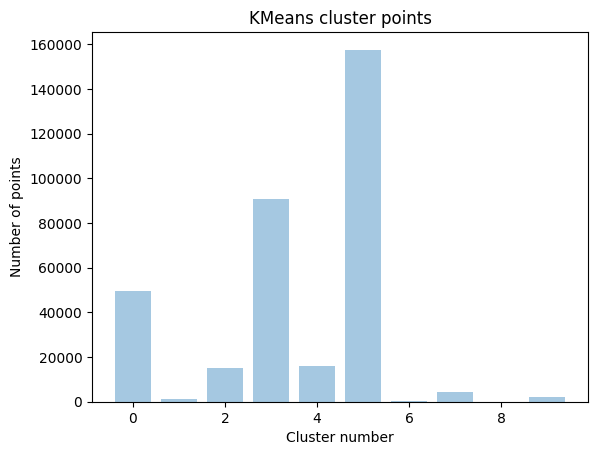

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['CleanedText'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[1][6]]['CleanedText'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
use huawei two year switch phone sever day ago definit star happi great build qualiti slim beauti design like feel metal bodi heavili use last one half day good enough mobil data fast sim fingerprint sensor work well like front side iphon overal satisfi


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
use huawei two year switch phone sever day ago definit star happi great build qualiti slim beauti design like feel metal bodi heavili use last one half day good enough mobil data fast sim fingerprint sensor work well like front side iphon overal satisfi


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
use huawei two year switch p

In [ ]:
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][3]]['CleanedText'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][15]]['CleanedText'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][25]]['CleanedText'])

phone arriv without key blackberri softwar load touch pad appear indent ive attempt contact use ref head theyv repli send order number holiday weekend stay tune world program softwar load appear download accord carrier touch pad depress top cover make less effect use could defect phone work folk cell loung exchang fulli function model hope updat cell loung call arrang phone exchang replac new phone arriv night servic extra cost physic condit phone appear good touch pad defect one even though still find way download world app appar univers type phone avail aftermarket possibl load mobil abl connect specialist abl walk process could get phone sync tabl yay thank cynthia kind help excel follow
______________________________________________________________________
amazon seller rock never anoth blu product due seller amazon phone could gold could gold window positivesit blu say like use need window phone purchas blu win anoth compani earlier year want back phone purchas blu win smartphon s

In [ ]:
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][3]]['CleanedText'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][5]]['CleanedText'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][10]]['CleanedText'])

broke first day
______________________________________________________________________
problem great durabl flip phone front screen still mine incas smartphon break
______________________________________________________________________
first go return glitch went away work well


In [ ]:
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][3]]['CleanedText'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][15]]['CleanedText'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][25]]['CleanedText'])

dont hate worri right coz read review said still lock said minor scratch incomplet accessori hope ill get perfect one complet accessori like total brand new ill updat review got partial reviewsinc got happi seem like brand new like scratch someth els accessori charger pin sim card lumia cyan one come blue silicon case origin charger manual warranti card box got ross cellular came that reason seem like bought phone alon without accessori kinda disappoint sinc phone work well unlock unfortun live counti use metropc signal get lte cant use ill updat review ill tri differ sim card differ network
______________________________________________________________________
unfortun take star crack appear replac phone realli love phone realli frustrat ive crack appear nowher two phone move iphon nextbit robin hesit use iphon actual bought samsung galaxi year ago return hate differ android io design robin realli struck cord decid give shot fell love soon held phone hand actual realli easi transit an

In [ ]:
#K means using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(final['CleanedText'].values)
tfidf.shape

(336769, 46655)

In [ ]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10,random_state=99)
model_tf.fit(tfidf)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [ ]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[7.03919635e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.35950595e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.49603857e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
terms1 = tfidf_vect.get_feature_names_out()

In [ ]:
terms1[1:10]

array(['aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaamaz', 'aaaaaand',
       'aaaaargh', 'aaaaaw', 'aaaalll'], dtype=object)

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [ ]:
silhouette_score_tf

0.03436510110352404

In [ ]:
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

<ipython-input-43-77a075ba889f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Clus Label'] = model_tf.labels_


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,Bow Clus Label,Tfidf Clus Label
262126,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,positive,! am very satisfied with this phone. I had the...,1.0,satisfi phone phone broke year use abus like m...,0,7
81591,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,positive,"!!!! Great phone move fast everything , but th...",0.0,great phone move fast everyth batteri poor,3,0
156366,BLU Studio XL Android Smartphone - GSM Unlocke...,BLU,99.99,positive,!!!!!Update!!!!! a year later and this phone h...,6.0,updat year later phone serious problem batteri...,7,0
165598,"Casio GzOne C731 Rock, Black (Verizon Wireless...",Casio,177.79,positive,!!!!THIS PHONE DOES NOT USE THE NEW STANDARD U...,0.0,phone use new standard usb type charger cant b...,4,7
348910,"Samsung Galaxy S5 G900F Unlocked Cellphone, In...",Samsung,328.99,positive,!!Buyer beware!! got screwed over with an impo...,0.0,buyer bewar got screw import bill perfect came...,5,4


In [ ]:
df1.groupby(['Tfidf Clus Label'])['CleanedText'].count()

Tfidf Clus Label
0     36814
1      8043
2     12711
3      9637
4    128325
5      7450
6      5371
7    107688
8      9578
9     11152
Name: CleanedText, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: batteri
 phone
 sim
 card
 charg
 use
 life
 work
 good
 great
Cluster 1: excel
 phone
 thank
 condit
 recommend
 good
 seller
 price
 love
 smartphon
Cluster 2: great
 phone
 work
 price
 condit
 thank
 buy
 fast
 deal
 good
Cluster 3: love
 phone
 great
 daughter
 new
 thank
 wife
 work
 good
 son
Cluster 4: work
 excelent
 good
 like
 thank
 expect
 great
 phone
 use
 iphon
Cluster 5: perfect
 work
 condit
 phone
 everyth
 thank
 great
 love
 new
 arriv
Cluster 6: nice
 phone
 price
 product
 love
 good
 work
 great
 thank
 realli
Cluster 7: phone
 work
 great
 use
 good
 one
 like
 love
 get
 new
Cluster 8: product
 excel
 good
 great
 recommend
 thank
 seller
 fast
 ship
 deliveri
Cluster 9: good
 phone
 price
 work
 thank
 far
 qualiti
 realli
 condit
 buy


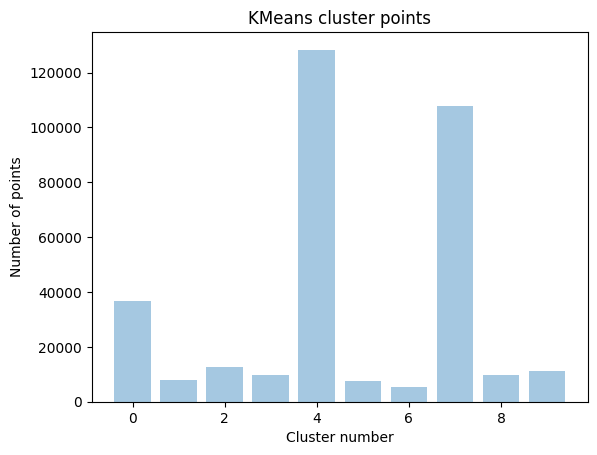

In [ ]:
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['CleanedText'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[1][4]]['CleanedText'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[1][8]]['CleanedText'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[1][12]]['CleanedText'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
product hold charg well unit purchas


nice


love work like new thank honest


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
product hold charg well unit purchas


nice


love work like new thank honest


______________________________________________________________________
4 review of assigned to cluster  2
----------------------------------------------------------------------
product hold charg well unit purchas


nice


love work like new thank honest


______________________________________________________________________
4 review of assigned to cluster  3
----------------------------------------------------------------------
product hold charg well unit purchas


nice


love work like new thank honest


___________________________________________

In [ ]:
# Word to vector Clustering
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [ ]:
print(final['CleanedText'].values[0])
print(list_of_sent[0])

satisfi phone phone broke year use abus like much want anoth happi abl purchas anoth like new condit happi happi
['satisfi', 'phone', 'phone', 'broke', 'year', 'use', 'abus', 'like', 'much', 'want', 'anoth', 'happi', 'abl', 'purchas', 'anoth', 'like', 'new', 'condit', 'happi', 'happi']


In [ ]:
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [ ]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [ ]:
import gensim
#to train the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,workers=4)

In [ ]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

<ipython-input-61-162ab9b4d7a5>:13: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(336769, 100)

In [ ]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

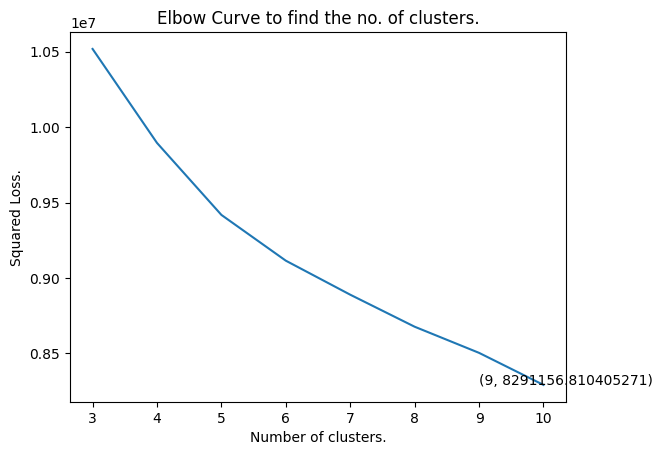

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  8291156.810405271


In [ ]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [ ]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [ ]:
word_cluster_center[1:2]

array([[ 0.33356896, -0.64394294, -0.24251621,  0.47106616, -0.00947799,
         0.70939887, -0.10810086, -0.98993939,  0.54303009,  0.39343257,
         0.35991261, -0.16658736, -0.10420382,  0.21377376, -0.38054612,
         0.15644246, -0.32382408, -0.15532972,  0.71278108,  1.19481688,
        -0.77998135, -0.5195622 ,  0.22970806,  0.24725538, -0.86508523,
        -0.39421866,  0.48168211,  0.59810185,  0.68253321,  0.52292503,
         0.19168581, -0.07114406, -0.01498392,  0.10352999, -0.07751731,
         0.34561524, -0.39074403,  0.63239467,  0.00774198,  0.11650944,
         0.38061172,  0.51298696,  0.44264612,  0.42179907, -0.34290431,
         1.42692087, -0.55422961,  0.15910963,  0.08310503, -0.67470733,
        -0.12955048,  0.68669606,  0.06343693, -0.15317193,  0.3495036 ,
        -0.10012486, -0.03134658, -0.00858538,  0.76498618, -0.32702769,
        -0.56372594,  0.6039665 , -0.08762068, -0.1436015 ,  0.74767437,
        -0.84287214, -0.73469842,  0.2618004 ,  0.5

In [ ]:

dfa = df1
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)

<ipython-input-67-8c9df285eb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['AVG-W2V Clus Label'] = model2.labels_


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
262126,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,positive,! am very satisfied with this phone. I had the...,1.0,satisfi phone phone broke year use abus like m...,0,7,5
81591,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,positive,"!!!! Great phone move fast everything , but th...",0.0,great phone move fast everyth batteri poor,3,0,1


In [ ]:
dfa.groupby(['AVG-W2V Clus Label'])['CleanedText'].count()

AVG-W2V Clus Label
0    114997
1     44777
2      5945
3     32161
4      9702
5     93058
6     14639
7     10528
8     10962
Name: CleanedText, dtype: int64

In [ ]:

for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" *  70)
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['CleanedText'])
    print('\n')
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['CleanedText'])
    print('\n')
    print("_" * 70)

In [ ]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist):
          l = int(lower_bound(dists, dist))
          if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 


In [ ]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

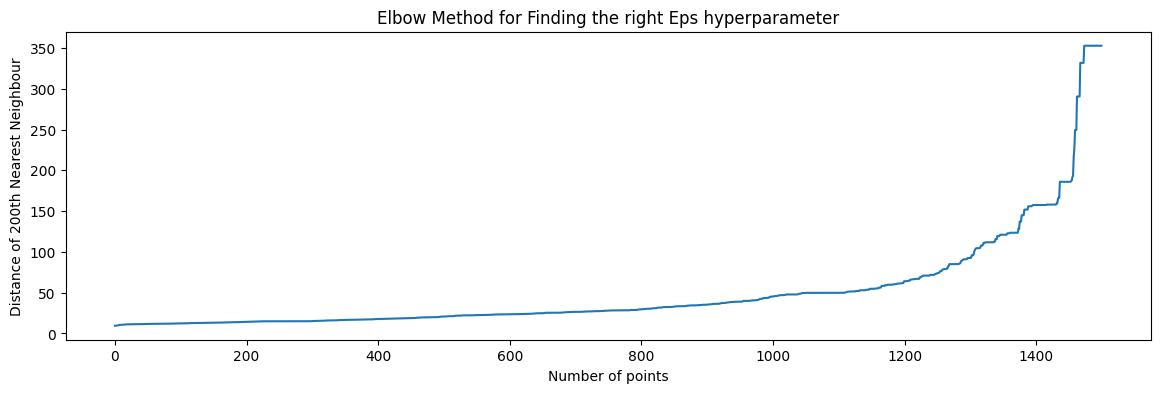

In [ ]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN

In [ ]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
      dist = np.sum((x - val) **2 ) 
      if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
      else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

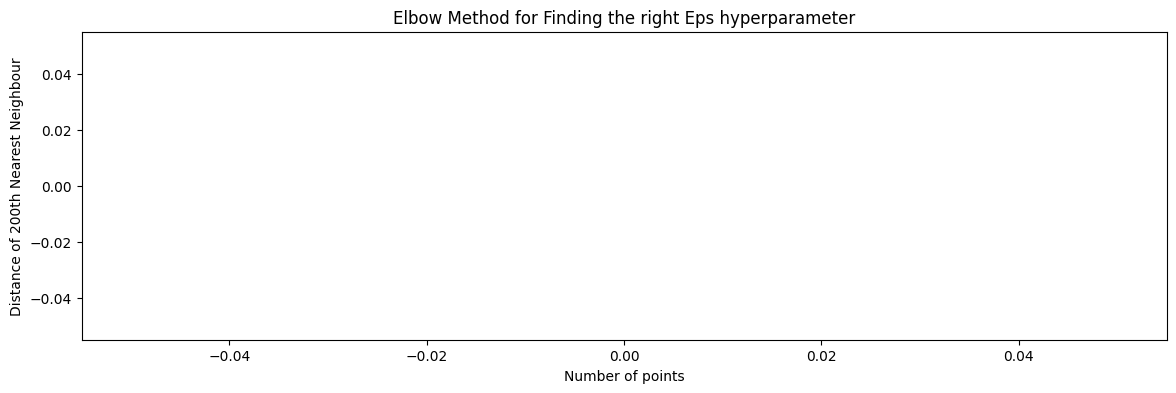

In [ ]:
# Plotting for the Elbow Method :
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
dfdb.groupby(['AVG-W2V Clus Label'])['Id'].count()

In [ ]:
#Hierarchy clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

In [ ]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Text'].count()

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Text'])
    print('\n')
    print("_" * 70)

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)
'''
K Means clusters:5 th clusters has more reviews.Group3 and group5 has more negative reviews on phones like replace. scratch.In Kmeans tfidf the cluster 4 and 7 has more words.Group1 has positive reviews. 

'''
